In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [22]:
data = pd.read_csv(r"C:\Users\vaide\OneDrive\Desktop\car.csv")


In [23]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [24]:
Missing_Values = ["?"," ","_","NaN"]
data = pd.read_csv(r"C:\Users\vaide\OneDrive\Desktop\car.csv", na_values= Missing_Values)


In [25]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,0
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [26]:
data.dtypes


MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object

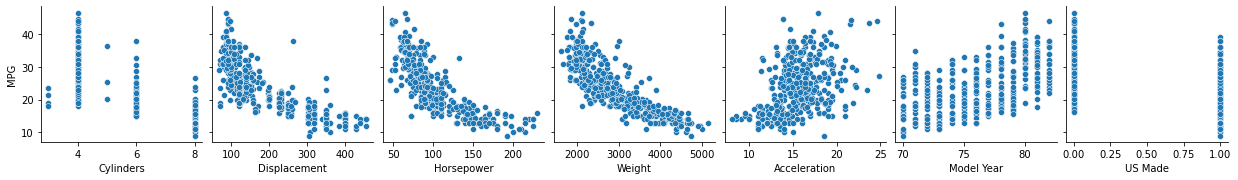

In [27]:
sns.pairplot(data, x_vars=data.drop(['MPG'], 
             axis=1, inplace=False).columns, y_vars= ['MPG'])

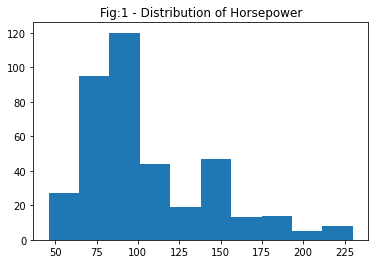

In [28]:
plt.hist(data.Horsepower)
plt.title('Fig:1 - Distribution of Horsepower')
plt.show()

In [29]:
data = data.fillna(data.median())
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [30]:
print(data.describe())

              MPG   Cylinders  Displacement  Horsepower       Weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model Year     US Made  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    0.625628  
std        2.757689    3.697627    0.484569  
min        8.000000   70.000000    0.000000  
25%       13.825000   73.000000    0.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

In [31]:
cor = data.corr()
cor

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
MPG,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,-0.568192
Cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,0.604351
Displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,0.651407
Horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,0.485418
Weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,0.598398
Acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,-0.250806
Model Year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.139883
US Made,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,1.000000


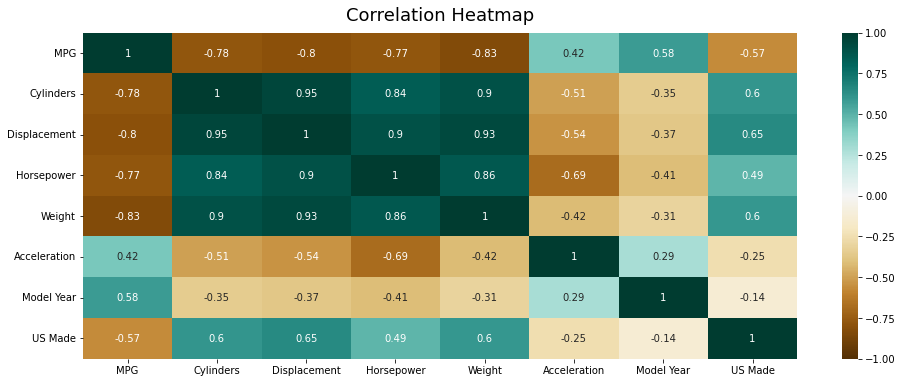

In [62]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [33]:
# Split the variables for X and Y sets
X = data.drop(['MPG'], axis=1)
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [34]:
Y = data["MPG"]
Y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_Train, X_Test,Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [36]:
X_Train.shape, X_Test.shape

((318, 7), (80, 7))

In [37]:
Y_Train.shape, Y_Test.shape

((318,), (80,))

In [38]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

X_Train_sm = sm.add_constant(X_Train)
X_Train_sm.head()

,const,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
64,1.0,8,318.0,150.0,4135,13.5,72,1
55,1.0,4,97.0,60.0,1834,19.0,71,0
317,1.0,4,97.0,78.0,2188,15.8,80,0
102,1.0,4,97.0,46.0,1950,21.0,73,0
358,1.0,4,120.0,74.0,2635,18.3,81,0


In [40]:
model1 = sm.OLS(Y_Train, X_Train_sm).fit()

In [41]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          9.51e-112
Time:                        10:32:47   Log-Likelihood:                -829.51
No. Observations:                 318   AIC:                             1675.
Df Residuals:                     310   BIC:                             1705.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.0757      5.127     -3.331   

In [ ]:
#Feature Selection based on p-value

In [43]:
DF1= data.drop(['Horsepower', 'Acceleration','Cylinders'], axis=1)

In [44]:
X = DF1.drop(['MPG'], axis=1)
Y = DF1["MPG"]
X_Train, X_Test,Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state = 0)
X_Train_sm = sm.add_constant(X_Train)
model2 = sm.OLS(Y_Train, X_Train_sm).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     342.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          7.26e-113
Time:                        10:34:51   Log-Likelihood:                -835.71
No. Observations:                 318   AIC:                             1681.
Df Residuals:                     313   BIC:                             1700.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.3565      4.426     -4.148   

In [50]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [51]:
LR = LinearRegression()

SF_model3 = SFS(LR,k_features =4 ,forward=True, floating= False, 
                                             scoring="r2", verbose=2, cv=5)

SF_model3.fit(X_Train,Y_Train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-06-06 10:41:35] Features: 1/4 -- score: 0.6736902579436463[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-06-06 10:41:35] Features: 2/4 -- score: 0.7955284076035284[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-06-06 10:41:35] Features: 3/4 -- score: 0.8063212923698373[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=4,
                          scoring='r2', verbose=2)

In [52]:
SF_model3.k_feature_names_ 

('Displacement', 'Weight', 'Model Year', 'US Made')

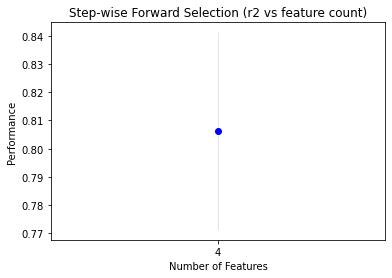

In [61]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(SF_model3.get_metric_dict(), kind='std_dev')
plt.title('Step-wise Forward Selection (r2 vs feature count)')
plt.show()